In [30]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import mglearn

In [31]:
X,y = make_blobs(cluster_std=4.0) # 분산 cluster_std -> variance 가 커지면 bias가 줄어든다.

In [32]:
pd_x = pd.DataFrame(X, columns=['x','y'])
pd_y = pd.DataFrame(y, columns=['target'])

In [33]:
# 데이터 붙이기 -> seaborn에서 그림을 구분해서 그릴 수 있어서이다. 
data = pd.concat([pd_x,pd_y],axis=1)

In [34]:
data

,x,y,target
0,5.597049,7.578757,2
1,2.301291,7.460876,2
2,4.061910,3.940848,2
3,-5.020239,3.510090,1
4,2.767148,12.024040,2
5,6.881182,4.525641,1
6,-1.902851,12.729980,1
7,9.845426,5.640130,2
8,14.530744,7.018028,2
9,9.279720,4.575186,2


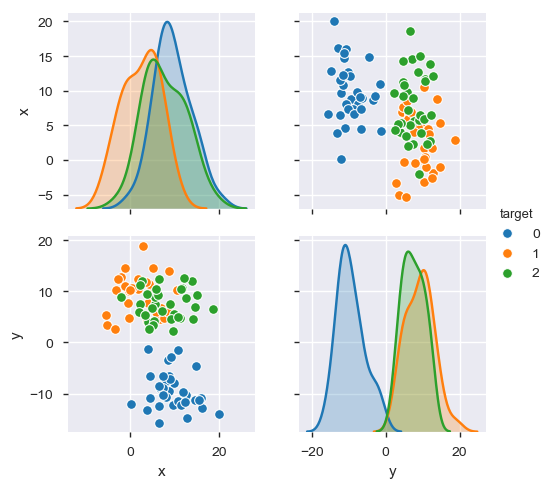

In [35]:
sns.pairplot(data,vars=['x','y'],hue='target')
# cluster_std=1.0 보다 4.0 이 구분하기가 어려워진다. 
# preprocessing에 속하는 scailing 기법을 써서 데이터 자체를 정규화해서 바꾸면 알고리즘과 상관없이 모델링이 가능하다. 
# 분산에 root를 씌운 게 std (표준편차)

In [36]:
!pip install pandas_profiling

In [37]:
import pandas_profiling

In [38]:
dir(pandas_profiling)

['DEFAULT_OUTPUTFILE',
 'NO_OUTPUTFILE',
 'ProfileReport',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'codecs',
 'describe',
 'formatters',
 'plot',
 'report',
 'templates',
 'to_html']

In [39]:
pandas_profiling.ProfileReport(data)

Number of variables,3
Number of observations,100
Total Missing (%),0.0%
Total size in memory,2.4 KiB
Average record size in memory,24.8 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [23]:
data.describe()

,x,y,target
count,100.000000,100.000000,100.000000
mean,-1.993519,0.449190,0.990000
std,6.555711,6.662786,0.822598
min,-10.265332,-11.540135,0.000000
25%,-6.964636,-7.980702,0.000000
50%,-5.157074,3.814953,1.000000
75%,6.267035,5.357833,2.000000
max,9.737608,9.246333,2.000000


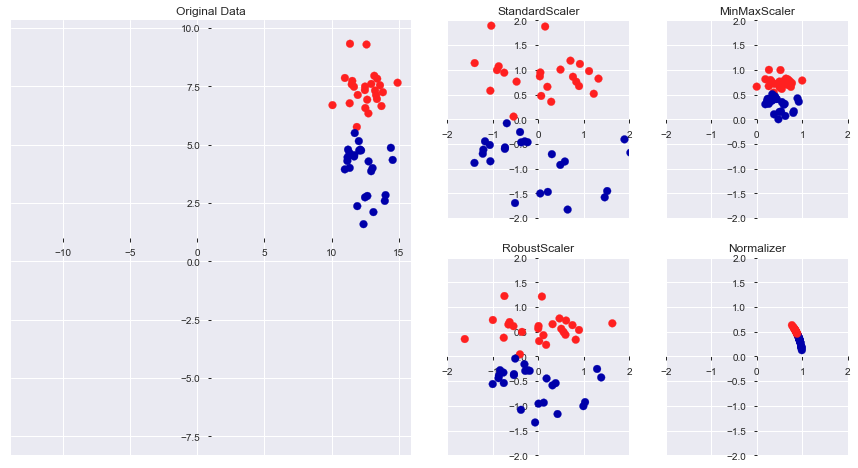

In [44]:
%matplotlib inline
mglearn.plot_scaling.plot_scaling()

In [45]:
# hyper parameter, algorithm, data 변경 

In [46]:
# Z = (X - n) / Sigma => 표준화 

In [47]:
# StandardScaler -> 데이터 간 차이때문에 있을 수 있는 문제를 상쇄 
# MinMaxScaler -> 뉴럴네트워크 관련하여 데이터를 0과 1사이로 받기 때문
# RobustScaler -> outlier 를 조작해줌  
# Normalizer -> 알고리즘이 구분하기 쉽게 처리 

In [48]:
# Prediction할 때도 Prediction 하고 싶은 거 바꿔서 처리 

In [94]:
ss = StandardScaler()

In [95]:
#ss.fit_transform(data[['x']]) # fancy indexing 해서 넣는다. 

In [96]:
t = ss.fit_transform(data[['x']])
t_ = ss.fit_transform(data[['x','y']])
t.shape

(100, 1)

In [97]:
x = pd.DataFrame(t)
y = pd.DataFrame(t_)

In [98]:
x

,0
0,-0.216899
1,-0.846271
2,-0.510055
3,-2.244420
4,-0.757309
5,0.028324
6,-1.649111
7,0.594389
8,1.489116
9,0.486359


In [99]:
y

,0,1
0,-0.216899,0.577217
1,-0.846271,0.564280
2,-0.510055,0.177978
3,-2.244420,0.130705
4,-0.757309,1.065060
5,0.028324,0.242156
6,-1.649111,1.142532
7,0.594389,0.364464
8,1.489116,0.515680
9,0.486359,0.247593


In [100]:
tt = data.iloc[:,:-1]

In [101]:
tt

,x,y
0,5.597049,7.578757
1,2.301291,7.460876
2,4.061910,3.940848
3,-5.020239,3.510090
4,2.767148,12.024040
5,6.881182,4.525641
6,-1.902851,12.729980
7,9.845426,5.640130
8,14.530744,7.018028
9,9.279720,4.575186


In [102]:
ss = data[['x','y']]

In [103]:
tt == ss

,x,y
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [104]:
xx = data[data.columns[:-1]]

In [105]:
tt == xx

,x,y
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [106]:
data.values # data frame -> numpy format

array([[  5.5970485 ,   7.57875692,   2.        ],
       [  2.301291  ,   7.46087594,   2.        ],
       [  4.06191023,   3.94084779,   2.        ],
       [ -5.02023908,   3.51009019,   1.        ],
       [  2.76714808,  12.02404004,   2.        ],
       [  6.88118186,   4.52564127,   1.        ],
       [ -1.90285107,  12.72998048,   1.        ],
       [  9.84542607,   5.64012985,   2.        ],
       [ 14.5307443 ,   7.01802848,   2.        ],
       [  9.2797202 ,   4.57518623,   2.        ],
       [  8.84289308,  -9.44098603,   0.        ],
       [  4.79575782,   9.01788636,   1.        ],
       [  6.80643729,  -8.90433162,   0.        ],
       [  4.58790376,   9.92039688,   1.        ],
       [ 11.68139908,  10.61890253,   2.        ],
       [ -3.1700032 ,  10.36144012,   1.        ],
       [  6.58445265,   6.41417948,   1.        ],
       [  4.81327271,   8.77226644,   1.        ],
       [ 16.10400036, -12.84005863,   0.        ],
       [  8.96222107,   7.45564

In [107]:
data.values.shape

(100, 3)

In [108]:
k = data.iloc[:,:-1].values

In [109]:
ssss = StandardScaler()

In [110]:
ssss.fit_transform(k)

array([[-0.21689912,  0.57721665],
       [-0.84627061,  0.56427993],
       [-0.51005548,  0.17797819],
       [-2.24442028,  0.13070516],
       [-0.75730862,  1.06505951],
       [ 0.02832429,  0.24215573],
       [-1.64911097,  1.14253219],
       [ 0.59438863,  0.36446409],
       [ 1.48911638,  0.51568011],
       [ 0.4863591 ,  0.24759299],
       [ 0.40294078, -1.29059689],
       [-0.36991691,  0.73515238],
       [ 0.01405076, -1.23170233],
       [-0.40960958,  0.83419744],
       [ 0.94499363,  0.91085419],
       [-1.89109159,  0.88259926],
       [-0.02834034,  0.44941134],
       [-0.36657219,  0.70819708],
       [ 1.78955187, -1.66362449],
       [ 0.42572815,  0.56370629],
       [ 1.56069628, -0.75500579],
       [ 1.52014052, -1.49923462],
       [-0.14746845,  0.39733748],
       [-0.18498133,  0.72754167],
       [ 1.58986837,  0.77374829],
       [ 0.80236625, -0.42453701],
       [-0.04278312, -1.62365569],
       [-0.40705457, -1.45464665],
       [ 1.36600049,

In [111]:
ssss.fit_transform(k).shape

(100, 2)

In [112]:
kk = pd.DataFrame(ssss.fit_transform(k))

In [113]:
kk == y

,0,1
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [ ]:
# sampling 할 때 random package 3개 알아야 함 

In [ ]:
# random 
# statistics 

In [53]:
# 한 열만 바꿔서 처리하는 것 연습 reshape(-1,1) -> 열은 알지만 행은 알아서 처리하라는 의미로 -1,1
ss.fit_transform(data['x'].values.reshape(-1,1)) # fancy indexing 해서 넣는다. 
# data frame은 받을 수 있는데 series는 못 받는다. 
# numpy format or pandas format만 가능 

array([[-0.21689912],
       [-0.84627061],
       [-0.51005548],
       [-2.24442028],
       [-0.75730862],
       [ 0.02832429],
       [-1.64911097],
       [ 0.59438863],
       [ 1.48911638],
       [ 0.4863591 ],
       [ 0.40294078],
       [-0.36991691],
       [ 0.01405076],
       [-0.40960958],
       [ 0.94499363],
       [-1.89109159],
       [-0.02834034],
       [-0.36657219],
       [ 1.78955187],
       [ 0.42572815],
       [ 1.56069628],
       [ 1.52014052],
       [-0.14746845],
       [-0.18498133],
       [ 1.58986837],
       [ 0.80236625],
       [-0.04278312],
       [-0.40705457],
       [ 1.36600049],
       [-0.95330878],
       [ 0.35429055],
       [-0.48662283],
       [-0.44572335],
       [ 0.25652402],
       [ 0.60139273],
       [-0.05866722],
       [-1.30013133],
       [-1.67729358],
       [ 0.24714359],
       [-0.57062805],
       [ 0.16954163],
       [-0.54220239],
       [ 0.85036152],
       [-0.3115527 ],
       [-1.48225994],
       [-1